<a href="https://colab.research.google.com/github/adigandi/.github.io/blob/master/Copy_of_Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# ohne Ausrufezeichen bei Ausführung im lokalen Notebook
!pip install --upgrade deeplearning2020
from deeplearning2020.datasets import ImageWoof
from deeplearning2020 import helpers



Requirement already up-to-date: deeplearning2020 in /usr/local/lib/python3.6/dist-packages (0.4.21)


In [0]:
%tensorflow_version 2.x # Befehl für Google Colab für Tensorflow 2

# TensorFlow ≥2.0 wird benötigt
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation, Input, \
  Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # Befehl für Google Colab für Tensorflow 2`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:

train_data, test_data, classes = ImageWoof.load_data()

def preprocess(image, label):
    resized_image = tf.image.resize(image, [300, 300])
    return resized_image, label


# Festlegung der Batch Größe für die Datenvorbereitung
batch_size = 32 

# Durchmischen der Trainingsdaten, dass nicht mit sortierten Bildern trainiert wird 

train_data = train_data.shuffle(1000) 

print('shape des Trainigsdatensatzes vor dem preprocessing: ', train_data)

train_data = train_data.map(preprocess) \
  .batch(batch_size).prefetch(1)          
test_data = test_data.map(preprocess) \
  .batch(batch_size).prefetch(1)

print('shape des Traingingsdatensatzes nach dem preprocessing: ', train_data)


# model
learning_rate=0.001
momentum=0.9
dense_neurons=100
filters_start=32
first_kernel_size=(7,7)
n_classes=10

activation='elu'

# Inputgröße muss 300x300 Pixel mit 3 RGB Farben betragen
input_layer = Input(shape=(300, 300, 3))

# Convolutional Neural Network
# 6 Convolutional Layers mit jeweils einer Max Pooling Layer
model = Conv2D(
    filters= filters_start,
    kernel_size=(7,7),
    activation=activation
)(input_layer)
model = MaxPooling2D((2,2))(model)

filters_start=filters_start*2

model = Conv2D(
    filters = filters_start, 
    kernel_size=(3,3), 
    activation=activation
)(model)
model = MaxPooling2D((2,2))(model)


filters_start=filters_start*2
model = Conv2D(
    filters = filters_start, 
    kernel_size=(3,3), 
    activation=activation
)(model)
model = MaxPooling2D((2,2))(model)


filters_start=filters_start*2
model = Conv2D(
    filters = filters_start, 
    kernel_size=(3,3), 
    activation=activation
)(model)
model = MaxPooling2D((2,2))(model)
filters_start=filters_start*2
model = Conv2D(
    filters = filters_start, 
    kernel_size=(3,3), 
    activation=activation
)(model)
model = MaxPooling2D((2,2))(model)
filters_start=filters_start*2
model = Conv2D(filters = filters_start, 
  kernel_size=(3,3), 
  activation=activation, 
  padding='same'
)(model)
model = MaxPooling2D((2,2))(model)

# Fully-Connected-Classifier
model = Flatten()(model)
model = Dense(
    dense_neurons,
    activation=activation
)(model)

model = Dense(
    dense_neurons/2,
    activation=activation
)(model)

model = Dense(
    dense_neurons /10,
    activation='tanh'
)(model)



# Output Layer
output = Dense(n_classes, activation="softmax")(model)

test_model = Model(input_layer, output)





test_model.compile(optimizer = tf.keras.optimizers.Adam(0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

test_model.summary
history_big = test_model.fit(train_data, epochs = 10, validation_data = test_data)





/root/.keras/datasets/imagewoof2-320/train
Loaded 9025 images
/root/.keras/datasets/imagewoof2-320/val
Loaded 3929 images
shape des Trainigsdatensatzes vor dem preprocessing:  <ShuffleDataset shapes: ((None, None, 3), ()), types: (tf.float32, tf.int64)>
shape des Traingingsdatensatzes nach dem preprocessing:  <PrefetchDataset shapes: ((None, 300, 300, 3), (None,)), types: (tf.float32, tf.int64)>
Epoch 1/10
283/283 [==============================] - 50s 175ms/step - loss: 2.1206 - accuracy: 0.2229 - val_loss: 2.0302 - val_accuracy: 0.2823
Epoch 2/10
283/283 [==============================] - 42s 147ms/step - loss: 1.9858 - accuracy: 0.2958 - val_loss: 1.9538 - val_accuracy: 0.3128
Epoch 3/10
283/283 [==============================] - 40s 143ms/step - loss: 1.8958 - accuracy: 0.3434 - val_loss: 1.9027 - val_accuracy: 0.3433
Epoch 4/10
283/283 [==============================] - 38s 135ms/step - loss: 1.8008 - accuracy: 0.3908 - val_loss: 1.8812 - val_accuracy: 0.3533
Epoch 5/10
283/283 [=

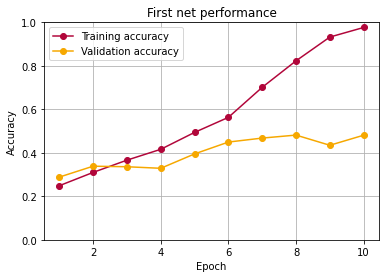

In [0]:
helpers.plot_history('First net performance', history_big, 0)